In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tqdm

In [4]:
os.chdir('data')
os.getcwd()

'/Users/samuelchazy/ML_files_X/Applied_Projects/Competitions/Kaggle/Micro_Business_Density/data'

In [5]:
train_df = pd.read_csv('train.csv')
train_df

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100


#### Drop active as it will not be provided in the test data

In [6]:
train_df = train_df.drop(['active'],axis=1)

### microbusiness density has a 2 year lag (2021 density figures are calculated using 2019 population figures)
1. cfips => A unique identifier for each county. The first two digits correspond to the state FIPS code, while the following 3 represent the county
2. df['column_lag'] = df['column'].shift(periods=2)

In [7]:
train_df['first_day_of_month'] = pd.to_datetime(train_df['first_day_of_month'])
train_df['year'] = train_df['first_day_of_month'].dt.year
train_df['month'] = train_df['first_day_of_month'].dt.month
train_df['year'] = train_df['year'].replace({2019:2017,2020:2018,2021:2019,2022:2020})

train_df

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,year,month
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,2017,8
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,2017,9
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,2017,10
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,2017,11
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,2017,12
...,...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,2020,6
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,2020,7
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,2020,8
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,2020,9


# Census Data

### census data has a 2 year lag

1. pct_bb_[year] => The percentage of households in the county with access to broadband of any type.
2. pct_college_[year] => The percent of the population in the county over age 25 with a 4-year college degree.
3. pct_foreign_born_[year] => The percent of the population in the county born outside the United States.
4. pct_it_workers_[year] => The percent of the workforce in the county employed in information related industries.
5. median_hh_inc_[year] => The median household income in the county.

In [8]:
census_starter = pd.read_csv('census_starter.csv')
census_starter

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,82.2,82.4,84.0,86.7,88.4,56037,15.3,15.2,14.8,13.7,...,0.6,0.6,1.0,0.9,1.0,71083,73008.0,74843,73384.0,76668.0
3138,83.5,85.9,87.1,89.1,90.5,56039,37.7,37.8,38.9,37.2,...,0.7,1.2,1.4,1.5,2.0,80049,83831.0,84678,87053.0,94498.0
3139,83.8,88.2,89.5,91.4,90.6,56041,11.9,10.5,11.1,12.6,...,1.2,1.2,1.4,1.7,0.9,54672,58235.0,63403,72458.0,75106.0
3140,76.4,78.3,78.2,82.8,85.4,56043,15.4,15.0,15.4,15.0,...,1.3,1.0,0.9,0.9,1.1,51362,53426.0,54158,57306.0,62271.0


In [9]:
train_df_final = pd.merge(train_df,census_starter,on=['cfips'],how='inner')
train_df_final

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,year,month,pct_bb_2017,pct_bb_2018,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,2017,8,76.6,78.9,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,2017,9,76.6,78.9,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,2017,10,76.6,78.9,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,2017,11,76.6,78.9,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,2017,12,76.6,78.9,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,2020,6,71.1,73.3,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,2020,7,71.1,73.3,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,2020,8,71.1,73.3,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,2020,9,71.1,73.3,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0


In [10]:
grouped = train_df_final.loc[:,['cfips','county','state']]
grouped = grouped.groupby(by=['cfips','county','state'],as_index=False).first()
dict_cfips = {grouped['cfips'][i]:[grouped['county'][i],grouped['state'][i]] for i in range(len(grouped))}

dict_cfips

{1001: ['Autauga County', 'Alabama'],
 1003: ['Baldwin County', 'Alabama'],
 1005: ['Barbour County', 'Alabama'],
 1007: ['Bibb County', 'Alabama'],
 1009: ['Blount County', 'Alabama'],
 1011: ['Bullock County', 'Alabama'],
 1013: ['Butler County', 'Alabama'],
 1015: ['Calhoun County', 'Alabama'],
 1017: ['Chambers County', 'Alabama'],
 1019: ['Cherokee County', 'Alabama'],
 1021: ['Chilton County', 'Alabama'],
 1023: ['Choctaw County', 'Alabama'],
 1025: ['Clarke County', 'Alabama'],
 1027: ['Clay County', 'Alabama'],
 1029: ['Cleburne County', 'Alabama'],
 1031: ['Coffee County', 'Alabama'],
 1033: ['Colbert County', 'Alabama'],
 1035: ['Conecuh County', 'Alabama'],
 1037: ['Coosa County', 'Alabama'],
 1039: ['Covington County', 'Alabama'],
 1041: ['Crenshaw County', 'Alabama'],
 1043: ['Cullman County', 'Alabama'],
 1045: ['Dale County', 'Alabama'],
 1047: ['Dallas County', 'Alabama'],
 1049: ['DeKalb County', 'Alabama'],
 1051: ['Elmore County', 'Alabama'],
 1053: ['Escambia County

In [11]:
test_df = pd.read_csv('test.csv')
test_df = pd.merge(test_df,census_starter,on='cfips',how='inner')

test_df['first_day_of_month'] = pd.to_datetime(test_df['first_day_of_month'])
test_df['year'] = test_df['first_day_of_month'].dt.year
test_df['month'] = test_df['first_day_of_month'].dt.month
test_df['year'] = test_df['year'].replace({2019:2017,2020:2018,2021:2019,2022:2020,2023:2021})

test_df['county'] = np.nan
test_df['state'] = np.nan

for i, id in tqdm.tqdm(enumerate(test_df['cfips']), total=len(test_df['cfips'])):
    for key,value in dict_cfips.items():
        if id == key:
            test_df.loc[i,'county'] = value[0]
            test_df.loc[i,'state'] = value[1]

test_df_1 = test_df.loc[:,['row_id','cfips','county','state','first_day_of_month','year','month']]
test_df_2 = test_df.iloc[:,3:-4]
test_df = pd.concat([test_df_1,test_df_2],axis=1)

test_df

100%|██████████| 25080/25080 [00:05<00:00, 4396.86it/s]


,row_id,cfips,county,state,first_day_of_month,year,month,pct_bb_2017,pct_bb_2018,pct_bb_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2022-11-01,1001,Autauga County,Alabama,2022-11-01,2020,11,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2022-12-01,1001,Autauga County,Alabama,2022-12-01,2020,12,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,1001_2023-01-01,1001,Autauga County,Alabama,2023-01-01,2021,1,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
3,1001_2023-02-01,1001,Autauga County,Alabama,2023-02-01,2021,2,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
4,1001_2023-03-01,1001,Autauga County,Alabama,2023-03-01,2021,3,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25075,56045_2023-02-01,56045,Weston County,Wyoming,2023-02-01,2021,2,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
25076,56045_2023-03-01,56045,Weston County,Wyoming,2023-03-01,2021,3,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
25077,56045_2023-04-01,56045,Weston County,Wyoming,2023-04-01,2021,4,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
25078,56045_2023-05-01,56045,Weston County,Wyoming,2023-05-01,2021,5,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0


# Check missing data and info of Train data

In [12]:
train_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122265 entries, 0 to 122264
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   row_id                 122265 non-null  object        
 1   cfips                  122265 non-null  int64         
 2   county                 122265 non-null  object        
 3   state                  122265 non-null  object        
 4   first_day_of_month     122265 non-null  datetime64[ns]
 5   microbusiness_density  122265 non-null  float64       
 6   year                   122265 non-null  int64         
 7   month                  122265 non-null  int64         
 8   pct_bb_2017            122265 non-null  float64       
 9   pct_bb_2018            122265 non-null  float64       
 10  pct_bb_2019            122265 non-null  float64       
 11  pct_bb_2020            122265 non-null  float64       
 12  pct_bb_2021            122265 non-null  floa

In [13]:
train_df_final.describe()

,cfips,microbusiness_density,year,month,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
count,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,...,122265.000000,122226.000000,122265.000000,122265.000000,122265.000000,122265.000000,122226.000000,122265.000000,122226.000000,122226.000000
mean,30376.037640,3.817671,2018.692308,6.692308,69.938724,72.707209,75.415981,78.559649,80.549729,13.817863,...,1.425933,1.381876,1.338341,1.310526,1.274354,49765.925359,51602.133376,53497.915152,55043.390236,58257.334716
std,15143.508721,4.991087,0.991089,3.390452,9.692780,9.248368,8.832590,8.239703,7.882099,5.582086,...,0.986235,0.941972,0.938483,0.990387,0.968480,13131.901157,13687.195242,14179.270474,14641.440770,15531.473714
min,1001.000000,0.000000,2017.000000,1.000000,24.500000,25.700000,34.800000,33.300000,37.000000,2.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,19264.000000,20188.000000,21504.000000,22292.000000,17109.000000
25%,18177.000000,1.639344,2018.000000,4.000000,64.200000,67.500000,70.500000,74.100000,76.400000,9.700000,...,0.800000,0.800000,0.700000,0.700000,0.600000,41134.000000,42491.000000,44185.000000,45689.000000,48237.000000
50%,29173.000000,2.586543,2019.000000,7.000000,70.800000,73.600000,76.500000,79.700000,81.700000,12.800000,...,1.300000,1.300000,1.200000,1.200000,1.100000,48073.000000,49891.000000,51790.000000,52861.500000,55923.000000
75%,45077.000000,4.519231,2020.000000,10.000000,76.400000,78.800000,81.400000,84.100000,85.900000,16.800000,...,1.900000,1.800000,1.800000,1.800000,1.700000,55764.000000,57616.000000,59931.000000,61505.000000,64949.000000
max,56045.000000,284.340030,2020.000000,12.000000,94.600000,95.500000,96.000000,97.100000,97.600000,43.700000,...,17.400000,11.700000,10.500000,15.200000,15.200000,129588.000000,136268.000000,142299.000000,147111.000000,156821.000000


In [14]:
train_df_final.duplicated().sum()

0

# Split Train data into X,y & train and validation data

In [15]:
X = train_df_final.drop('microbusiness_density',axis=1)
y = train_df_final['microbusiness_density']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,shuffle=True)

X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

In [17]:
X_train

,row_id,cfips,county,state,first_day_of_month,year,month,pct_bb_2017,pct_bb_2018,pct_bb_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,21061_2019-10-01,21061,Edmonson County,Kentucky,2019-10-01,2017,10,71.9,73.4,77.9,...,2.5,2.8,1.9,0.4,0.4,41114,41360.0,43401,44229.0,41533.0
1,26085_2021-04-01,26085,Lake County,Michigan,2021-04-01,2019,4,56.8,60.4,63.6,...,0.5,0.7,0.7,0.6,1.2,32309,34631.0,37320,38356.0,40753.0
2,6001_2019-08-01,6001,Alameda County,California,2019-08-01,2017,8,85.7,87.5,88.9,...,3.9,4.0,4.0,4.1,4.1,85743,92574.0,99406,104888.0,112017.0
3,5141_2022-01-01,5141,Van Buren County,Arkansas,2022-01-01,2020,1,58.2,60.4,64.0,...,0.0,0.1,0.1,0.0,0.1,34428,36897.0,38499,40442.0,40763.0
4,23007_2019-11-01,23007,Franklin County,Maine,2019-11-01,2017,11,75.3,75.6,77.5,...,1.5,1.1,0.9,0.4,0.3,45541,48053.0,51422,51630.0,53607.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97807,55003_2021-12-01,55003,Ashland County,Wisconsin,2021-12-01,2019,12,68.7,69.9,70.7,...,1.1,1.3,1.6,0.6,0.8,41505,43861.0,42510,47869.0,55070.0
97808,8019_2020-02-01,8019,Clear Creek County,Colorado,2020-02-01,2018,2,81.0,83.4,84.1,...,1.9,1.7,1.3,2.0,1.1,68534,69936.0,67060,71919.0,76313.0
97809,41039_2020-06-01,41039,Lane County,Oregon,2020-06-01,2018,6,80.8,82.9,85.1,...,1.7,1.7,1.6,1.3,1.2,47710,49958.0,52426,54942.0,59016.0
97810,21117_2022-06-01,21117,Kenton County,Kentucky,2022-06-01,2020,6,80.8,83.1,85.7,...,2.5,2.6,2.2,2.1,1.7,58674,61606.0,64339,66541.0,68503.0


In [18]:
y_train

0         0.678036
1         1.171362
2        10.699983
3         1.935870
4         3.320883
           ...    
97807     4.453408
97808     5.248514
97809     7.923846
97810     6.057597
97811     5.594206
Name: microbusiness_density, Length: 97812, dtype: float64

# Check the distribution of variables

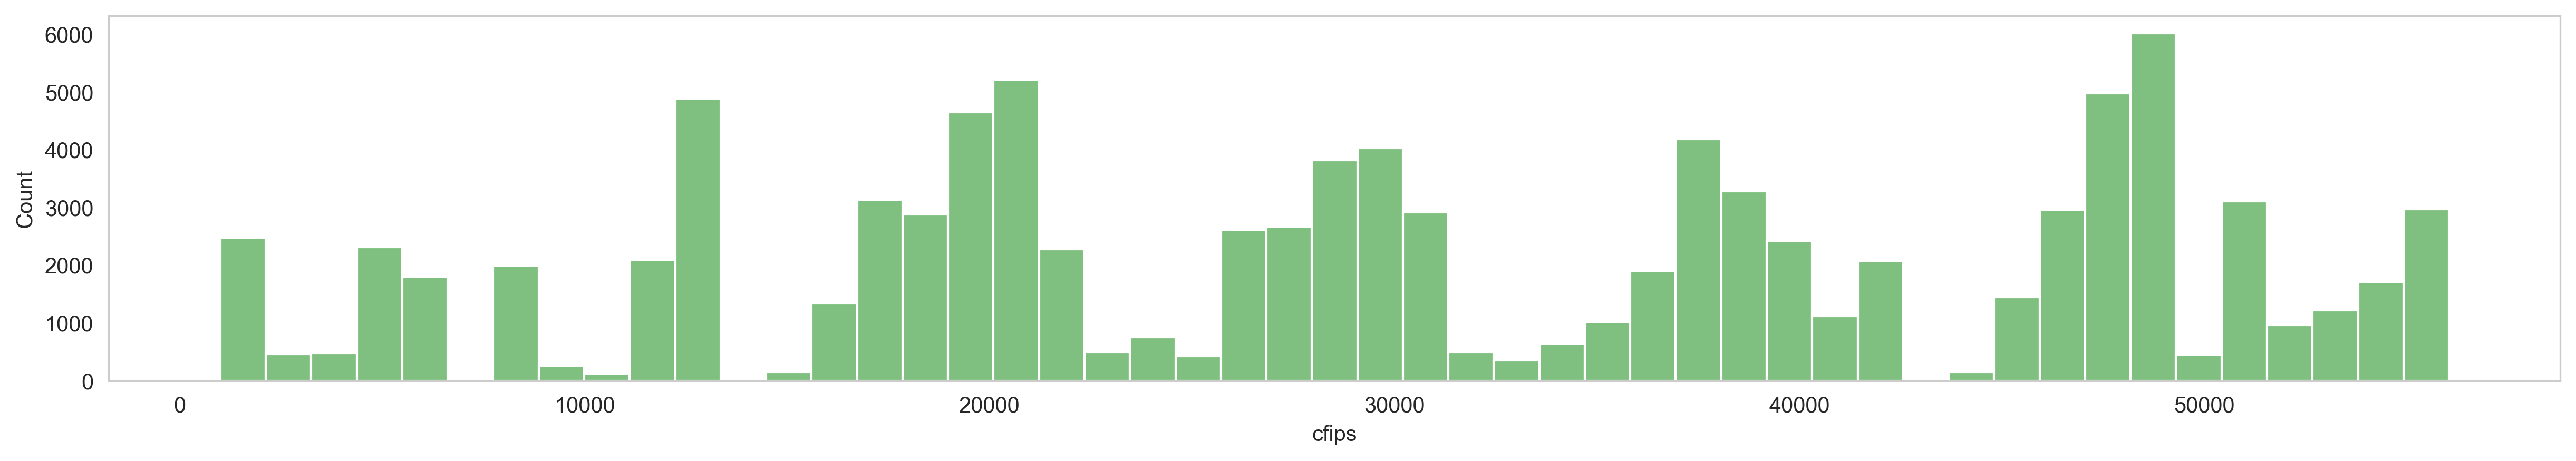

In [19]:
fig,ax = plt.subplots(figsize=(20,3),dpi=300)
year = pd.to_datetime(X_train['first_day_of_month']).dt.year
ax = sns.histplot(data=X_train,x='cfips',color='green',alpha=0.5)
plt.grid(False);

# Target variable

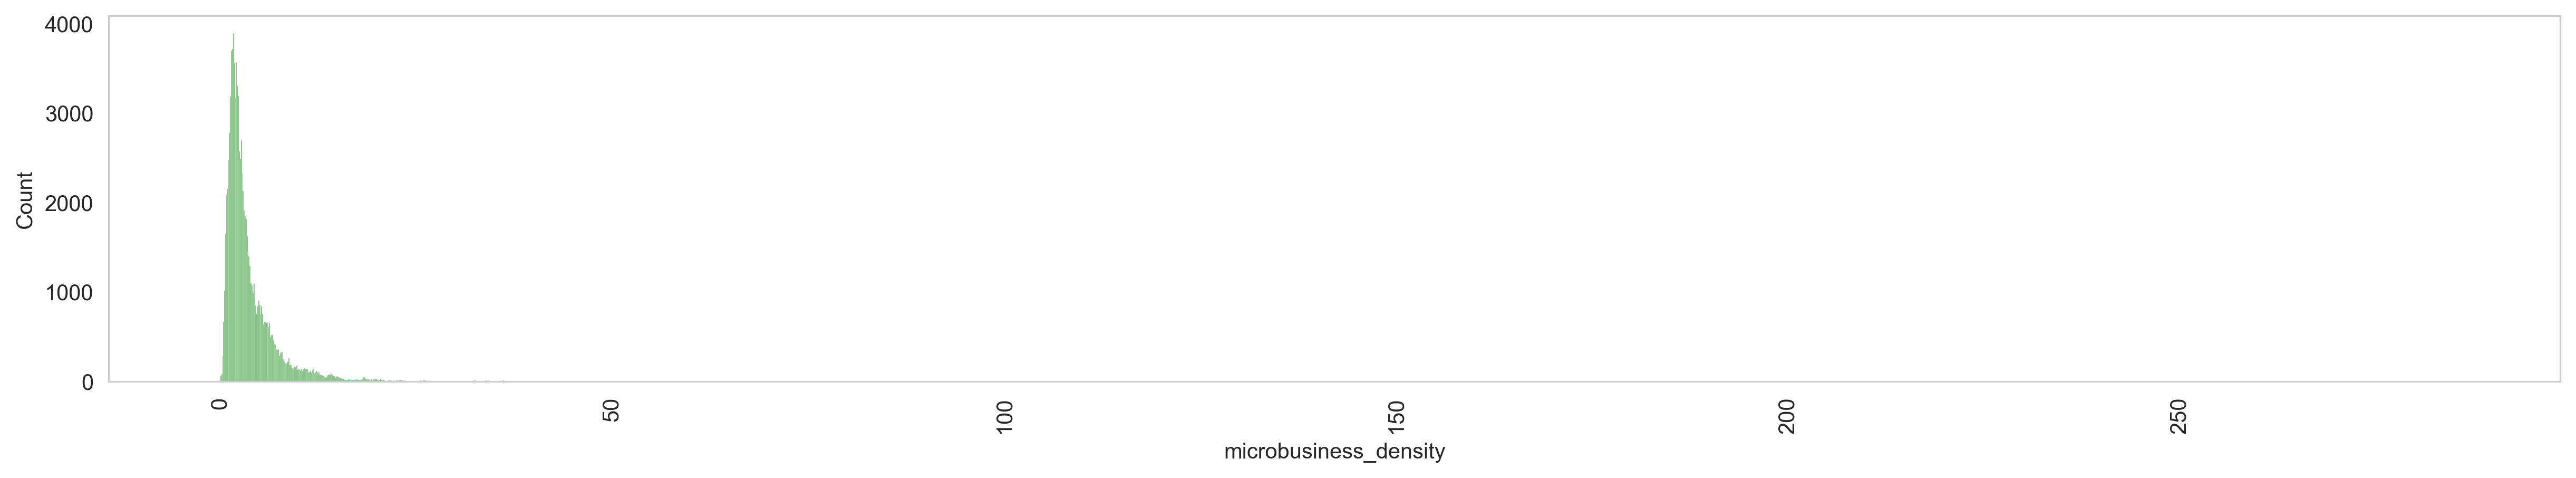

In [20]:
fig,ax = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.histplot(data=y_train,color='green',alpha=0.5)
plt.xticks(rotation=90)
plt.grid(False);

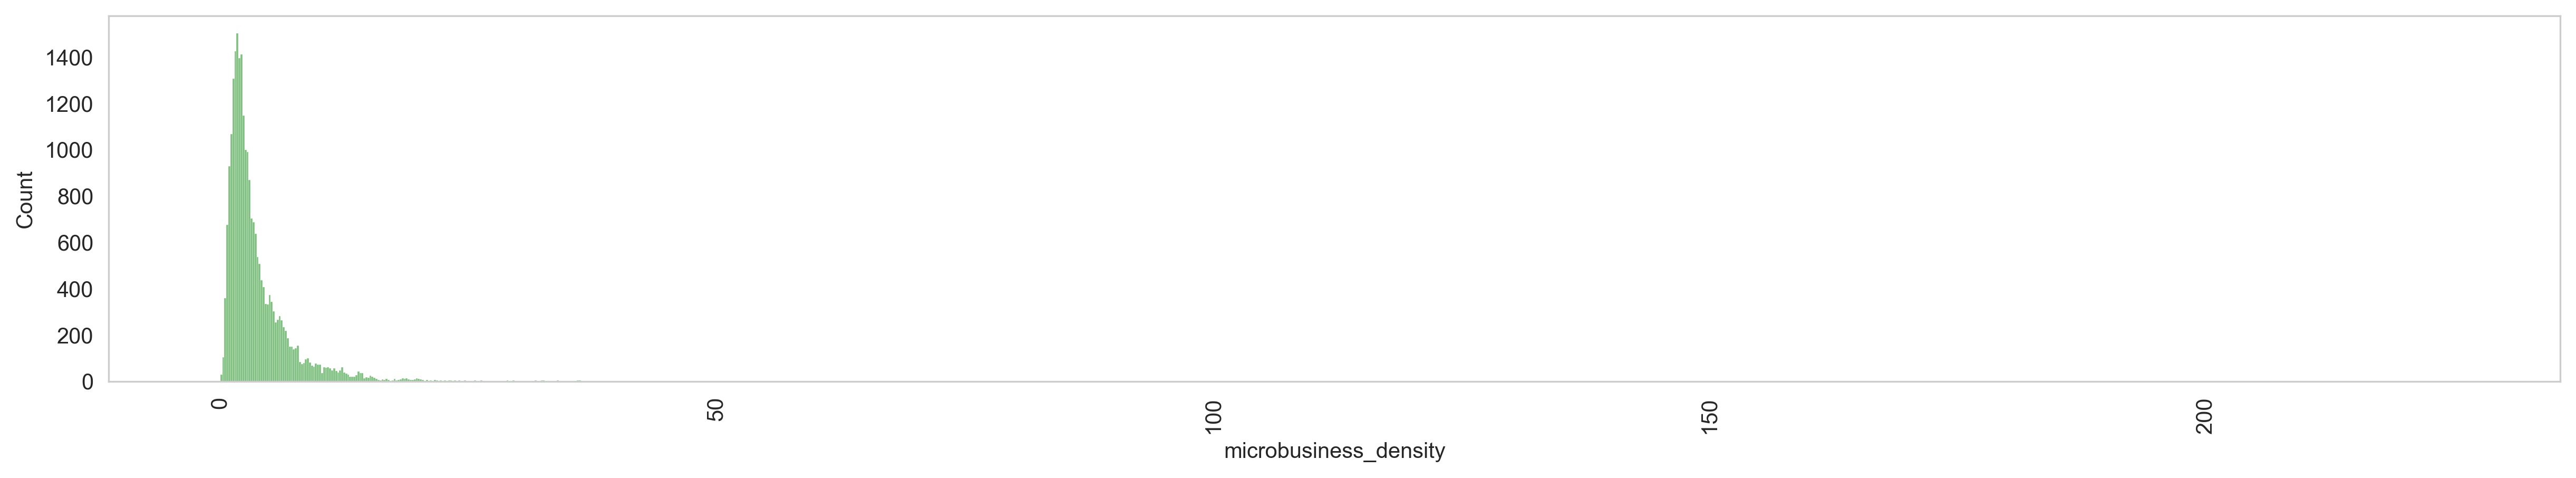

In [21]:
fig,ax = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.histplot(data=y_valid,color='green',alpha=0.5)
plt.xticks(rotation=90)
plt.grid(False);

### Remove outliers

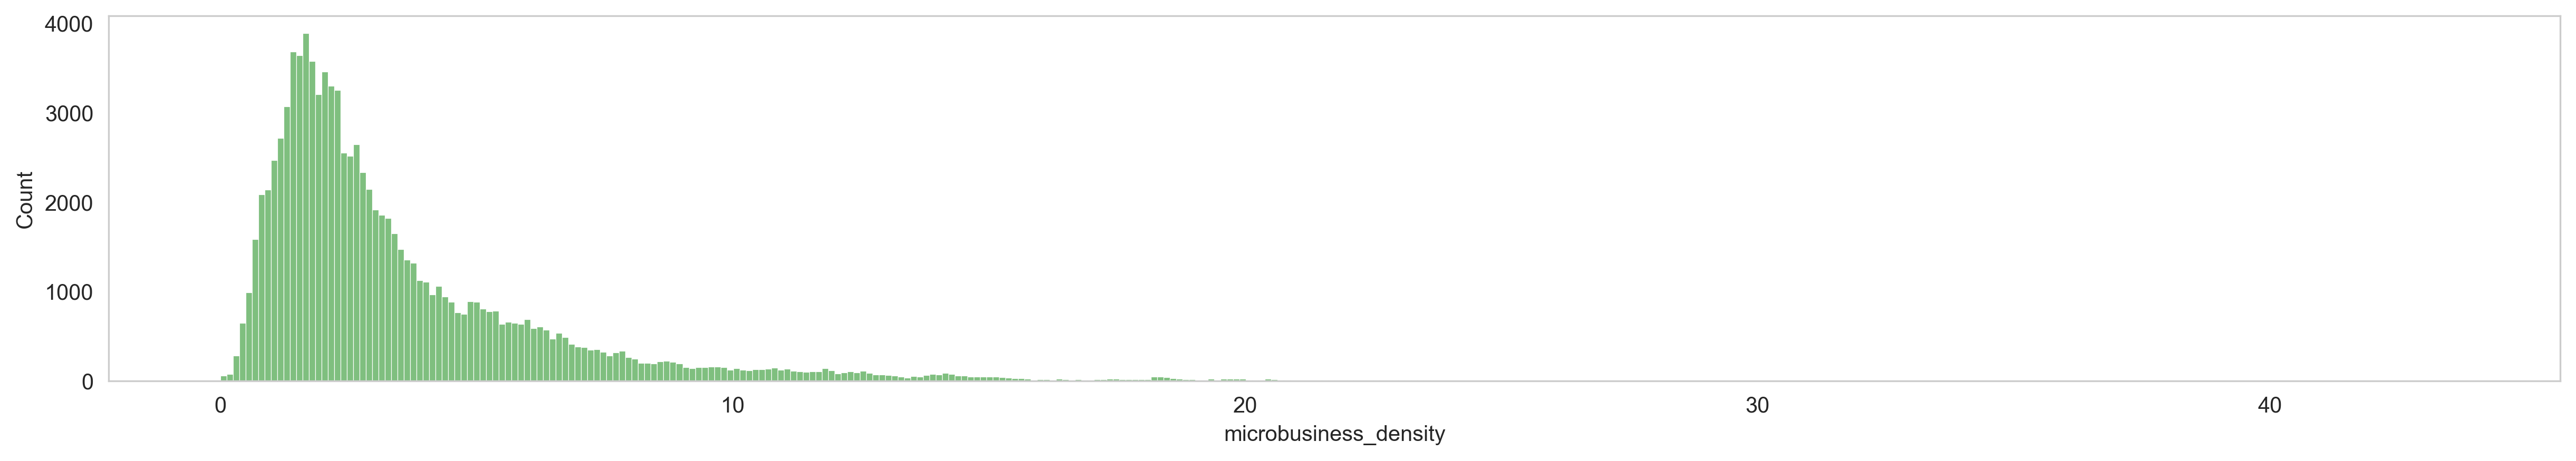

In [22]:
y_train_norm = pd.DataFrame(y_train)
y_train_norm['row_id'] = X_train['row_id']

lower_bound = y_train_norm['microbusiness_density'].mean() - 8*y_train_norm['microbusiness_density'].std()
higher_bound = y_train_norm['microbusiness_density'].mean() + 8*y_train_norm['microbusiness_density'].std()
y_train_norm = y_train_norm[(y_train_norm['microbusiness_density'] > lower_bound) & (y_train_norm['microbusiness_density'] < higher_bound)]

X_train_norm = X_train[X_train['row_id'].isin(y_train_norm['row_id'])].reset_index(drop=True)
y_train_norm = y_train_norm.drop('row_id',axis=1).reset_index(drop=True)

#y_train_norm = np.sqrt(y_train_norm)

fig,ax = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.histplot(data=y_train_norm['microbusiness_density'],color='green',alpha=0.5)
plt.xticks(rotation=0)
plt.grid(False);

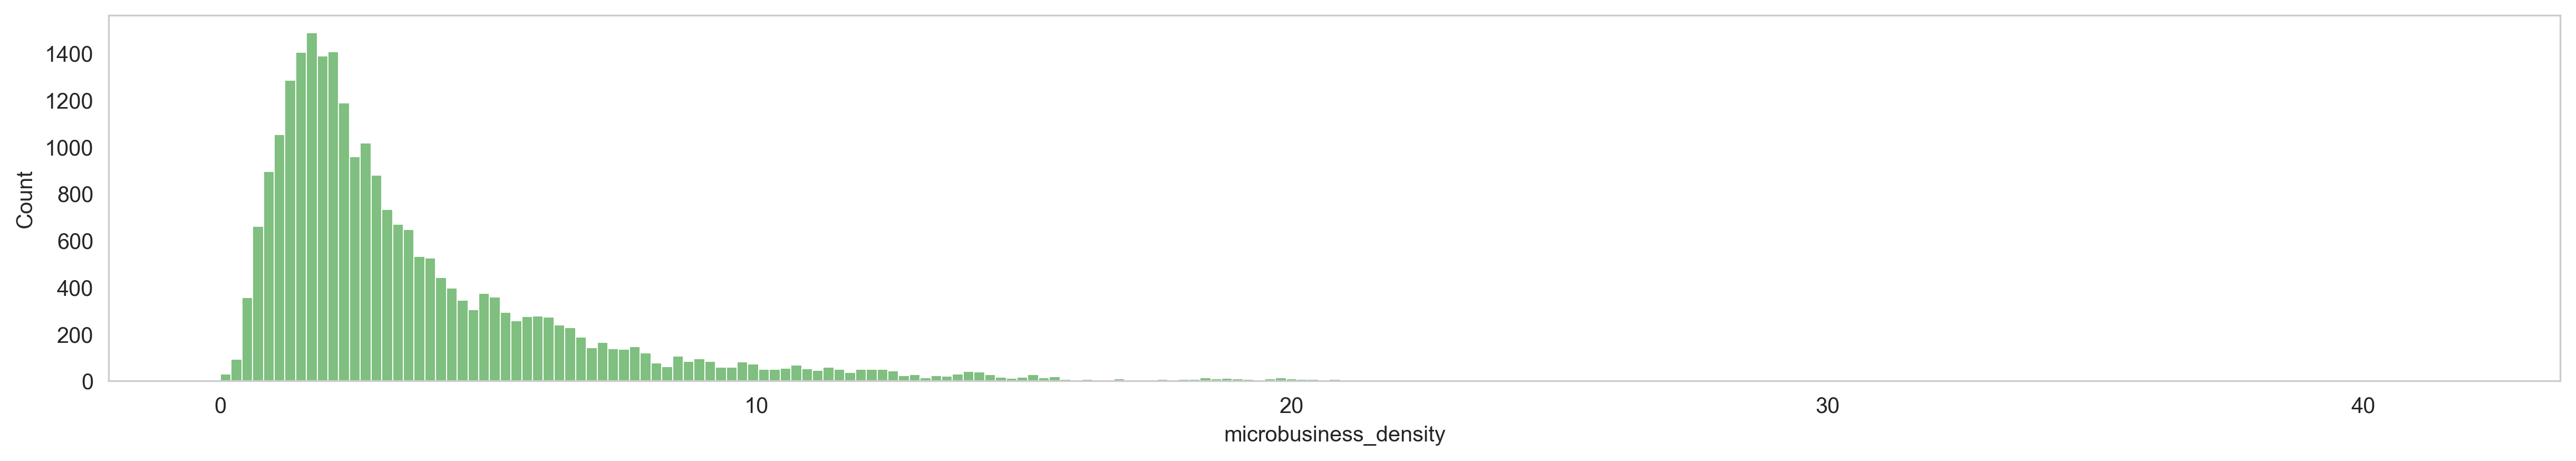

In [23]:
y_valid_norm = pd.DataFrame(y_valid)
y_valid_norm['row_id'] = X_valid['row_id']

lower_bound = y_valid_norm['microbusiness_density'].mean() - 8*y_valid_norm['microbusiness_density'].std()
higher_bound = y_valid_norm['microbusiness_density'].mean() + 8*y_valid_norm['microbusiness_density'].std()
y_valid_norm = y_valid_norm[(y_valid_norm['microbusiness_density'] > lower_bound) & (y_valid_norm['microbusiness_density'] < higher_bound)]

X_valid_norm = X_valid[X_valid['row_id'].isin(y_valid_norm['row_id'])].reset_index(drop=True)
y_valid_norm = y_valid_norm.drop('row_id',axis=1).reset_index(drop=True)

#y_valid_norm = np.sqrt(y_valid_norm)

fig,ax = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.histplot(data=y_valid_norm['microbusiness_density'],color='green',alpha=0.5)
plt.xticks(rotation=0)
plt.grid(False);

# Transformations

In [24]:
test_df

,row_id,cfips,county,state,first_day_of_month,year,month,pct_bb_2017,pct_bb_2018,pct_bb_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2022-11-01,1001,Autauga County,Alabama,2022-11-01,2020,11,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2022-12-01,1001,Autauga County,Alabama,2022-12-01,2020,12,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,1001_2023-01-01,1001,Autauga County,Alabama,2023-01-01,2021,1,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
3,1001_2023-02-01,1001,Autauga County,Alabama,2023-02-01,2021,2,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
4,1001_2023-03-01,1001,Autauga County,Alabama,2023-03-01,2021,3,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25075,56045_2023-02-01,56045,Weston County,Wyoming,2023-02-01,2021,2,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
25076,56045_2023-03-01,56045,Weston County,Wyoming,2023-03-01,2021,3,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
25077,56045_2023-04-01,56045,Weston County,Wyoming,2023-04-01,2021,4,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
25078,56045_2023-05-01,56045,Weston County,Wyoming,2023-05-01,2021,5,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0


In [25]:
from sklearn.cluster import KMeans
from category_encoders import TargetEncoder

def transform_data(X_train_df,y_train_y,X_valid_df,y_valid_y,test_df_df):

    encoder_A = TargetEncoder()
    encoder_A.fit(X_train_df['county'],y_train_y)
    encoder_B = TargetEncoder()
    encoder_B.fit(X_train_df['state'],y_train_y)

    ################################################ X_train ################################################
    X_train_df['county'] = encoder_A.transform(X_train_df['county']).astype(int)
    X_train_df['state'] = encoder_B.transform(X_train_df['state']).astype(int)

    X_train_df['mean'] = np.mean(X_train_df.iloc[:,7:],axis=1)
    X_train_df['var'] = np.var(X_train_df.iloc[:,7:],axis=1)
    X_train_df['std'] = np.std(X_train_df.iloc[:,7:],axis=1)

    X_train_df = X_train_df.drop('first_day_of_month',axis=1)
    X_train_df = X_train_df.drop(['row_id'],axis=1)

    X_train_df = X_train_df.fillna(X_train_df.mean())

    ################################################ X_valid ################################################
    X_valid_df['county'] = encoder_A.transform(X_valid_df['county']).astype(int)
    X_valid_df['state'] = encoder_B.transform(X_valid_df['state']).astype(int)

    X_valid_df['mean'] = np.mean(X_valid_df.iloc[:,7:],axis=1)
    X_valid_df['var'] = np.var(X_valid_df.iloc[:,7:],axis=1)
    X_valid_df['std'] = np.std(X_valid_df.iloc[:,7:],axis=1)

    X_valid_df = X_valid_df.drop('first_day_of_month',axis=1)
    X_valid_df = X_valid_df.drop(['row_id'],axis=1)

    X_valid_df = X_valid_df.fillna(X_valid_df.mean())

    ################################################ test_df ################################################
    test_df_df['county'] = encoder_A.transform(test_df_df['county']).astype(int)
    test_df_df['state'] = encoder_B.transform(test_df_df['state']).astype(int)

    test_df_df['mean'] = np.mean(test_df_df.iloc[:,7:],axis=1)
    test_df_df['var'] = np.var(test_df_df.iloc[:,7:],axis=1)
    test_df_df['std'] = np.std(test_df_df.iloc[:,7:],axis=1)

    test_df_df = test_df_df.drop('first_day_of_month',axis=1)
    test_df_df = test_df_df.drop(['row_id'],axis=1)

    test_df_df = test_df_df.fillna(test_df_df.mean())

    ################################################ Clustering ################################################

    # from sklearn.cluster import KMeans
    # k_values = range(1,20)
    # wcss = []
    #
    # for k in k_values:
    #     kmeans = KMeans(n_clusters=k)
    #     kmeans.fit(X_train_df)
    #     score = kmeans.inertia_
    #     wcss.append(score)
    #
    # plt.plot(k_values, wcss)
    # plt.xlabel('Number of clusters')
    # plt.ylabel('WCSS')
    # plt.show()


    Total_df = pd.concat([X_train_df,X_valid_df],axis=0)

    kmeans = KMeans(n_clusters=4)
    kmeans.fit(Total_df)
    labels = kmeans.labels_
    Total_df['cluster'] = labels

    X_train_df['cluster'] = kmeans.predict(X_train_df)
    X_valid_df['cluster'] = kmeans.predict(X_valid_df)
    test_df_df['cluster'] = kmeans.predict(test_df_df)

    ################################################ Output ################################################

    return X_train_df,X_valid_df,test_df_df

In [26]:
X_train_transformed,X_valid_transformed,test_df_transformed = transform_data(X_train_norm,y_train_norm,X_valid_norm,y_valid_norm,test_df)

/Users/samuelchazy/ML_files_X/Applied_Projects/Competitions/Kaggle/Predict_Future_Sales/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
X_train_transformed

,cfips,county,state,year,month,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,...,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,mean,var,std,cluster
0,21061,1,2,2017,10,71.9,73.4,77.9,80.2,81.7,...,0.4,41114,41360.0,43401,44229.0,41533.0,8482.432,2.756573e+08,5.205700e+07,3
1,26085,5,3,2019,4,56.8,60.4,63.6,67.7,71.5,...,1.2,32309,34631.0,37320,38356.0,40753.0,7349.608,2.083674e+08,3.934933e+07,3
2,6001,8,7,2017,8,85.7,87.5,88.9,91.1,92.2,...,4.1,85743,92574.0,99406,104888.0,112017.0,19815.680,1.520622e+09,2.871697e+08,2
3,5141,2,1,2020,1,58.2,60.4,64.0,66.8,69.9,...,0.1,34428,36897.0,38499,40442.0,40763.0,7655.956,2.254118e+08,4.256815e+07,3
4,23007,3,5,2017,11,75.3,75.6,77.5,79.1,80.4,...,0.3,45541,48053.0,51422,51630.0,53607.0,10029.424,3.866139e+08,7.301113e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97665,55003,3,3,2019,12,68.7,69.9,70.7,75.3,77.0,...,0.8,41505,43861.0,42510,47869.0,55070.0,9250.124,3.322541e+08,6.274529e+07,3
97666,8019,5,7,2018,2,81.0,83.4,84.1,85.9,87.0,...,1.1,68534,69936.0,67060,71919.0,76313.0,14174.008,7.714804e+08,1.456934e+08,1
97667,41039,4,5,2018,6,80.8,82.9,85.1,87.9,89.7,...,1.2,47710,49958.0,52426,54942.0,59016.0,10584.288,4.315924e+08,8.150534e+07,0
97668,21117,5,2,2020,6,80.8,83.1,85.7,88.6,89.1,...,1.7,58674,61606.0,64339,66541.0,68503.0,12808.768,6.306244e+08,1.190926e+08,0


In [28]:
test_df_transformed

,cfips,county,state,year,month,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,...,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,mean,var,std,cluster
0,1001,3,2,2020,11,76.6,78.9,80.6,82.7,85.5,...,1.1,55317,58786.0,58731,57982.0,62660.0,11759.02,5.306328e+08,1.002092e+08,0
1,1001,3,2,2020,12,76.6,78.9,80.6,82.7,85.5,...,1.1,55317,58786.0,58731,57982.0,62660.0,11759.02,5.306328e+08,1.002092e+08,0
2,1001,3,2,2021,1,76.6,78.9,80.6,82.7,85.5,...,1.1,55317,58786.0,58731,57982.0,62660.0,11759.02,5.306328e+08,1.002092e+08,0
3,1001,3,2,2021,2,76.6,78.9,80.6,82.7,85.5,...,1.1,55317,58786.0,58731,57982.0,62660.0,11759.02,5.306328e+08,1.002092e+08,0
4,1001,3,2,2021,3,76.6,78.9,80.6,82.7,85.5,...,1.1,55317,58786.0,58731,57982.0,62660.0,11759.02,5.306328e+08,1.002092e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25075,56045,2,6,2021,2,71.1,73.3,76.8,79.7,81.3,...,0.0,59605,52867.0,57031,53333.0,65566.0,11554.66,5.156075e+08,9.737163e+07,0
25076,56045,2,6,2021,3,71.1,73.3,76.8,79.7,81.3,...,0.0,59605,52867.0,57031,53333.0,65566.0,11554.66,5.156075e+08,9.737163e+07,0
25077,56045,2,6,2021,4,71.1,73.3,76.8,79.7,81.3,...,0.0,59605,52867.0,57031,53333.0,65566.0,11554.66,5.156075e+08,9.737163e+07,0
25078,56045,2,6,2021,5,71.1,73.3,76.8,79.7,81.3,...,0.0,59605,52867.0,57031,53333.0,65566.0,11554.66,5.156075e+08,9.737163e+07,0


# Check correlations

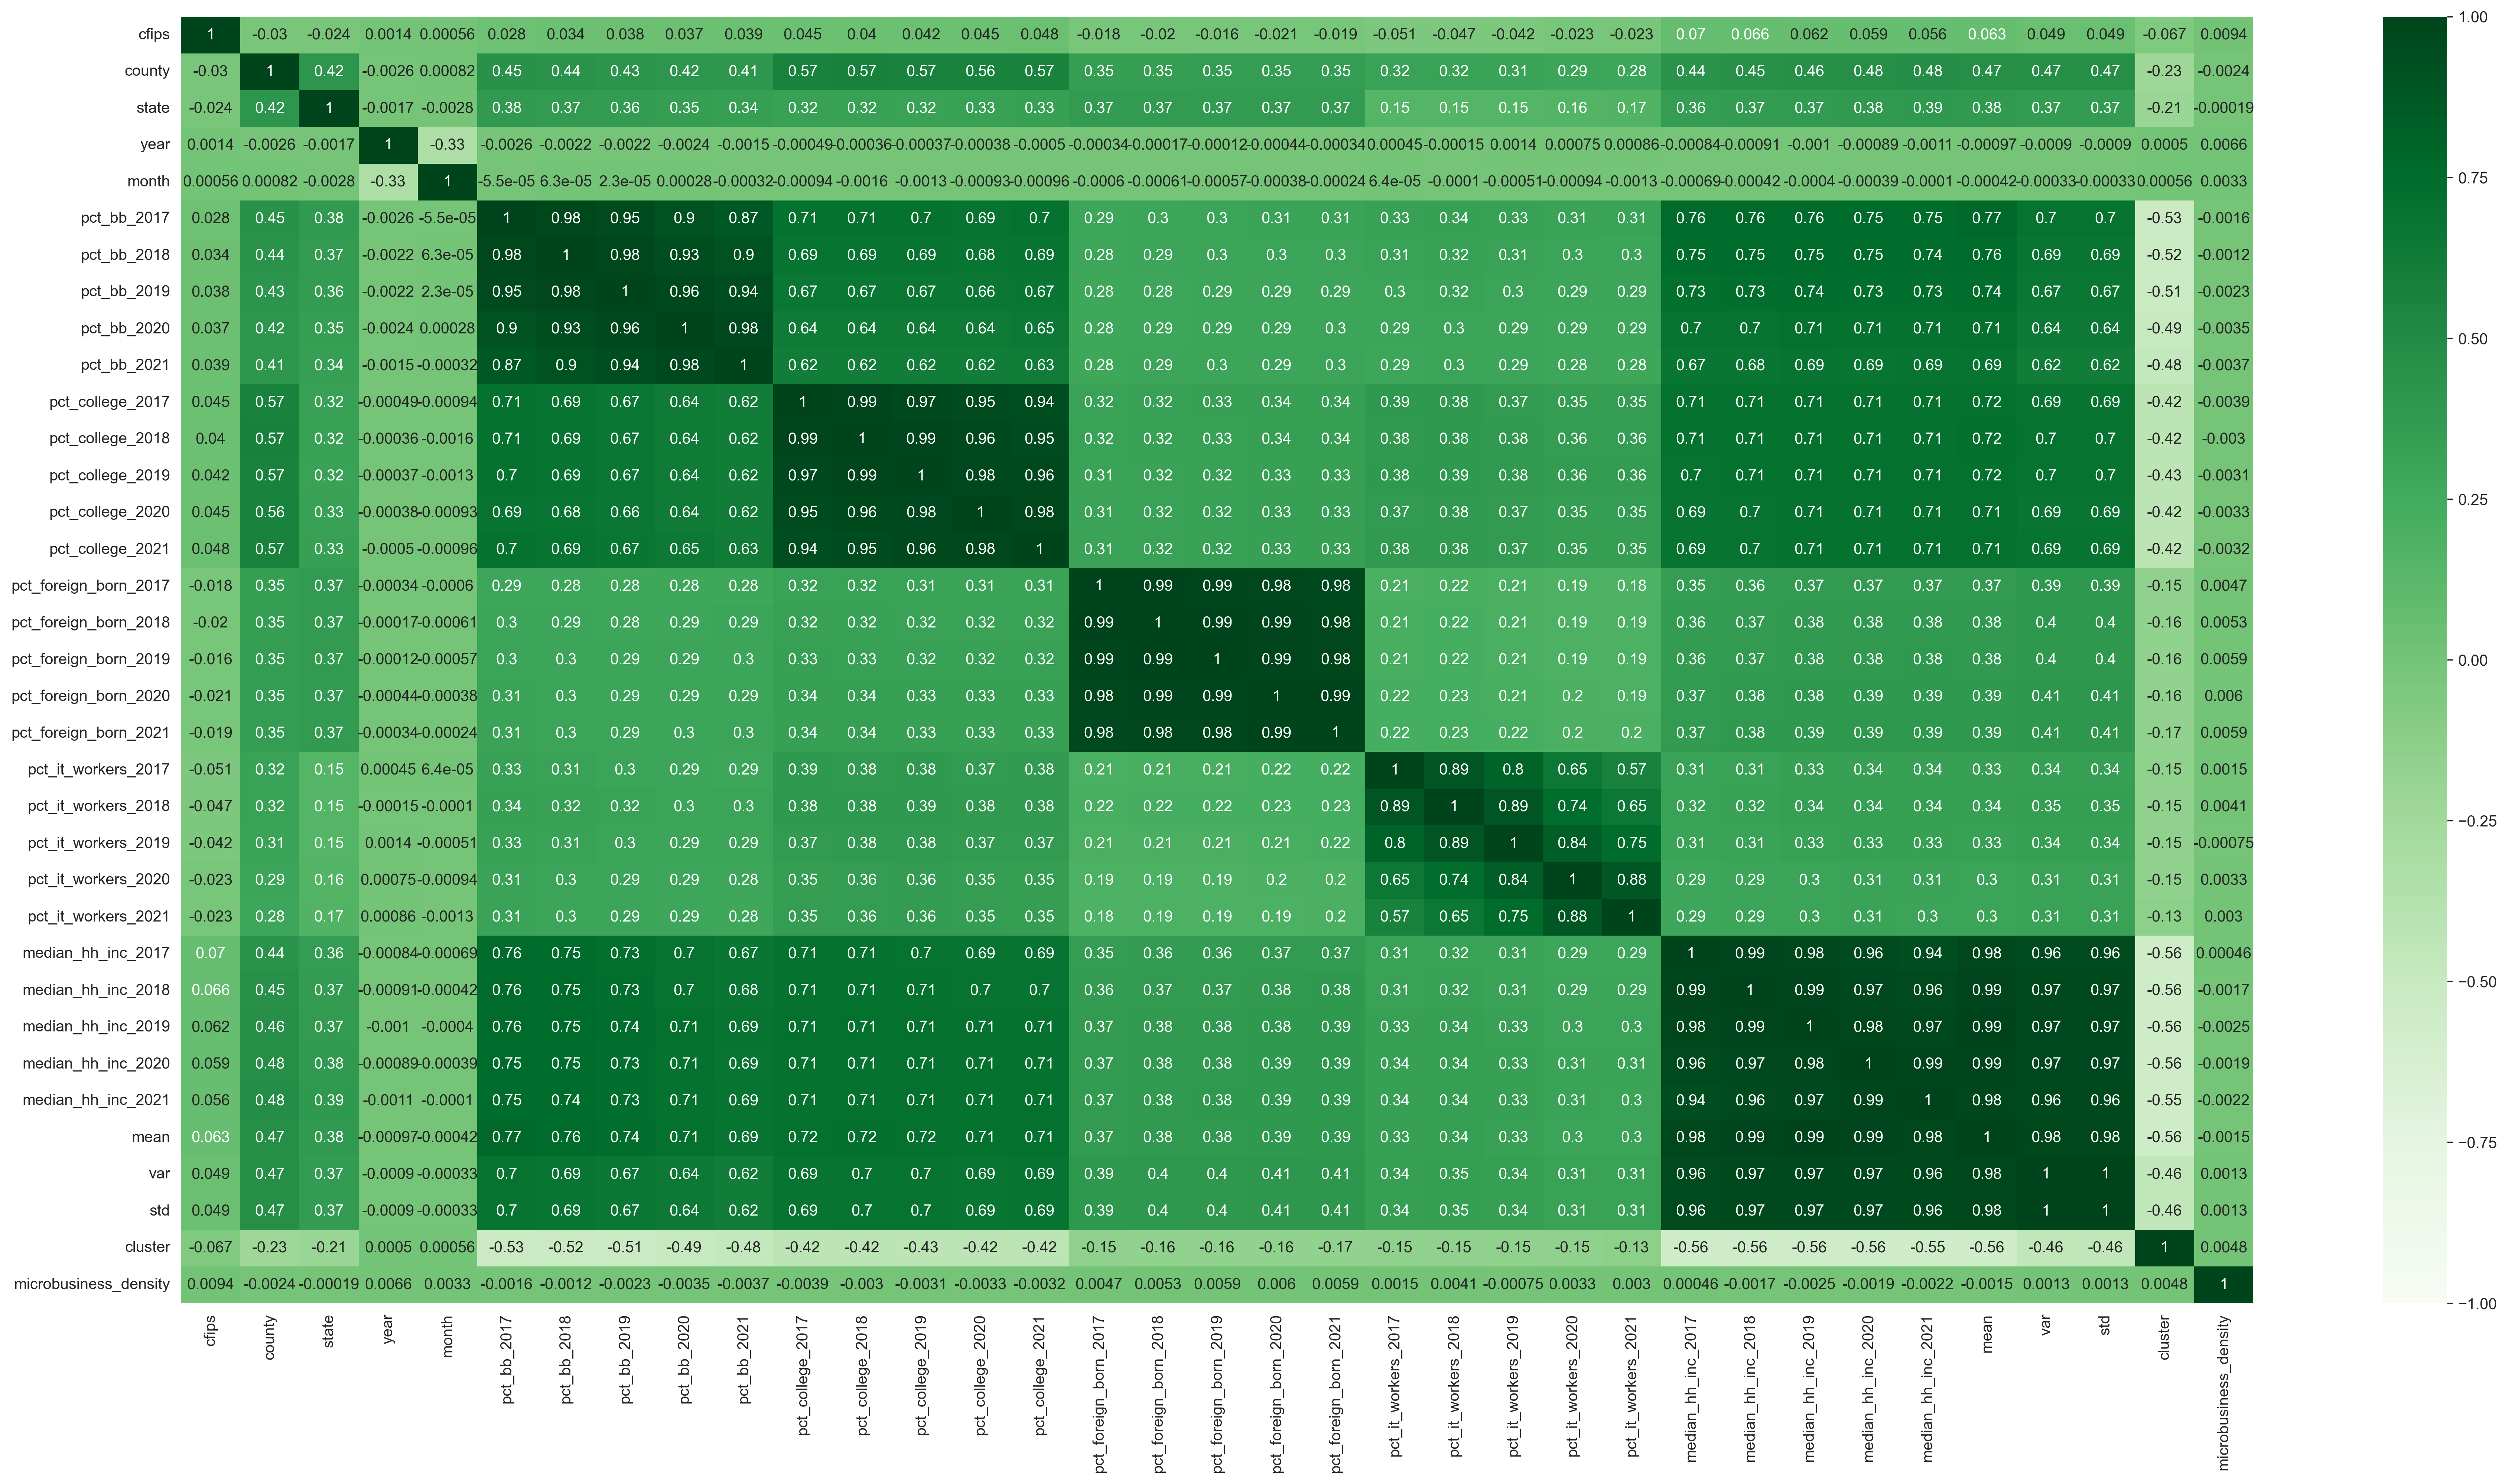

In [29]:
cor = X_train_transformed.copy()
cor = pd.concat([cor,y_valid],axis=1)
cor= cor.corr()

fig,ax = plt.subplots(figsize=(30,15),dpi=300)
ax = sns.heatmap(cor,annot=True,cmap='Greens',vmin=-1,vmax=1);

# Check Multicollinearity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vars = cor.copy()
vars = vars.drop(['microbusiness_density'],axis=1)

columns_to_drop = []

vif = pd.DataFrame()
vif['features'] = vars.columns
vif['vif_Factor'] = [variance_inflation_factor(vars.values, i) for i in range(vars.shape[1])]
vif.loc[vif['vif_Factor'] < 5, 'vif_Factor_Description'] = 'standard'
vif.loc[(vif['vif_Factor'] >= 5) & (vif['vif_Factor'] < 10), 'vif_Factor_Description'] = 'Concerning'
vif.loc[vif['vif_Factor'] >= 10, 'vif_Factor_Description'] = 'Problematic'

vif[vif['vif_Factor_Description'].isna() == False].sort_values(by='vif_Factor',ascending=False)

,features,vif_Factor,vif_Factor_Description
32,std,7.205759e+13,Problematic
31,var,7.205759e+13,Problematic
30,mean,2.200474e+11,Problematic
29,median_hh_inc_2021,1.094095e+10,Problematic
27,median_hh_inc_2019,9.150347e+09,Problematic
28,median_hh_inc_2020,8.374646e+09,Problematic
26,median_hh_inc_2018,8.109414e+09,Problematic
25,median_hh_inc_2017,7.419824e+09,Problematic
16,pct_foreign_born_2018,5.236283e+07,Problematic
15,pct_foreign_born_2017,1.483718e+07,Problematic


# Final Data

In [31]:
X_train_transformed_final = X_train_transformed.fillna(X_train_transformed.mean()).drop(columns_to_drop,axis=1)
X_valid_transformed_final = X_valid_transformed.fillna(X_valid_transformed.mean()).drop(columns_to_drop,axis=1)
test_df_transformed_final = test_df_transformed.fillna(test_df_transformed.mean()).drop(columns_to_drop,axis=1)

# Normalize the data

In [32]:
X_train_transformed_final

,cfips,county,state,year,month,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,...,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,mean,var,std,cluster
0,21061,1,2,2017,10,71.9,73.4,77.9,80.2,81.7,...,0.4,41114,41360.0,43401,44229.0,41533.0,8482.432,2.756573e+08,5.205700e+07,3
1,26085,5,3,2019,4,56.8,60.4,63.6,67.7,71.5,...,1.2,32309,34631.0,37320,38356.0,40753.0,7349.608,2.083674e+08,3.934933e+07,3
2,6001,8,7,2017,8,85.7,87.5,88.9,91.1,92.2,...,4.1,85743,92574.0,99406,104888.0,112017.0,19815.680,1.520622e+09,2.871697e+08,2
3,5141,2,1,2020,1,58.2,60.4,64.0,66.8,69.9,...,0.1,34428,36897.0,38499,40442.0,40763.0,7655.956,2.254118e+08,4.256815e+07,3
4,23007,3,5,2017,11,75.3,75.6,77.5,79.1,80.4,...,0.3,45541,48053.0,51422,51630.0,53607.0,10029.424,3.866139e+08,7.301113e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97665,55003,3,3,2019,12,68.7,69.9,70.7,75.3,77.0,...,0.8,41505,43861.0,42510,47869.0,55070.0,9250.124,3.322541e+08,6.274529e+07,3
97666,8019,5,7,2018,2,81.0,83.4,84.1,85.9,87.0,...,1.1,68534,69936.0,67060,71919.0,76313.0,14174.008,7.714804e+08,1.456934e+08,1
97667,41039,4,5,2018,6,80.8,82.9,85.1,87.9,89.7,...,1.2,47710,49958.0,52426,54942.0,59016.0,10584.288,4.315924e+08,8.150534e+07,0
97668,21117,5,2,2020,6,80.8,83.1,85.7,88.6,89.1,...,1.7,58674,61606.0,64339,66541.0,68503.0,12808.768,6.306244e+08,1.190926e+08,0


In [33]:
X_valid_transformed_final

,cfips,county,state,year,month,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,...,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,mean,var,std,cluster
0,19069,3,3,2020,6,66.8,67.4,72.1,75.2,79.1,...,0.2,48172,53742.0,56419,55630.0,59019.0,10937.308,4.607383e+08,8.700956e+07,0
1,17001,2,3,2020,8,72.7,75.8,78.2,80.7,82.6,...,1.3,48454,51398.0,52993,55052.0,58587.0,10678.732,4.388504e+08,8.287602e+07,0
2,30029,8,3,2017,11,79.9,81.9,84.0,84.7,87.3,...,1.6,51410,52966.0,56182,57763.0,63582.0,11297.780,4.920415e+08,9.292117e+07,0
3,37147,3,4,2020,2,75.9,78.2,80.8,83.8,84.4,...,1.9,43526,44315.0,47437,49337.0,50422.0,9422.988,3.409744e+08,6.439213e+07,3
4,13099,1,3,2018,5,52.0,54.5,49.1,52.0,55.7,...,0.9,29493,31567.0,30640,34811.0,39665.0,6660.064,1.723594e+08,3.254925e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24414,21183,2,2,2020,7,65.2,68.6,70.9,75.0,76.6,...,0.6,41470,42826.0,45564,45773.0,48481.0,8980.596,3.099703e+08,5.853700e+07,3
24415,21197,1,2,2020,2,56.3,60.6,64.7,68.1,72.1,...,1.2,34647,36958.0,37469,41071.0,39493.0,7600.768,2.220188e+08,4.192738e+07,3
24416,47025,1,3,2018,7,58.8,60.6,62.7,63.6,67.8,...,0.2,35428,36077.0,36835,37954.0,41938.0,7544.088,2.188462e+08,4.132824e+07,3
24417,45085,1,3,2020,3,70.2,72.8,74.9,77.9,80.0,...,1.7,41946,43792.0,45661,46570.0,49040.0,9098.780,3.179290e+08,6.003999e+07,3


In [34]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA

scaler_A = StandardScaler()
scaler_A.fit(X_train_transformed_final)

X_train_transformed_final = pd.DataFrame(scaler_A.transform(X_train_transformed_final),columns=X_train_transformed.columns)

X_valid_transformed_final = pd.DataFrame(scaler_A.transform(X_valid_transformed_final),columns=X_valid_transformed.columns)

test_df_transformed_final = pd.DataFrame(scaler_A.transform(test_df_transformed_final),columns=test_df_transformed.columns)

# pca = PCA(n_components=20)
# X_train_transformed_final = pd.DataFrame(pca.fit_transform(X_train_transformed_final))
# X_valid_transformed_final = pd.DataFrame(pca.transform(X_valid_transformed_final))
# test_df_transformed_final = pd.DataFrame(pca.transform(test_df_transformed_final))

# pd.DataFrame(pca.explained_variance_ratio_).T

In [35]:
X_train_transformed_final

,cfips,county,state,year,month,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,...,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,mean,var,std,cluster
0,-0.617994,-0.929851,-0.807816,-1.702377,0.973531,0.203613,0.075930,0.282094,0.199594,0.146836,...,-0.899301,-0.658491,-0.747771,-0.711748,-0.737749,-1.075755,-0.801962,-0.711721,-0.711748,0.931582
1,-0.286487,0.793192,-0.179936,0.313752,-0.794529,-1.353909,-1.330142,-1.337180,-1.318346,-1.146725,...,-0.074559,-1.329182,-1.239601,-1.140963,-1.139028,-1.125994,-1.204136,-0.952065,-0.952090,0.931582
2,-1.611726,2.085474,2.331584,-1.702377,0.384178,1.627043,1.600976,1.527688,1.523237,1.478442,...,2.915130,2.740971,2.995513,3.241255,3.406833,3.464006,3.221547,3.735016,3.734973,0.227681
3,-1.668473,-0.499091,-1.435696,1.321816,-1.678559,-1.209503,-1.330142,-1.291885,-1.427637,-1.349637,...,-1.208579,-1.167774,-1.073976,-1.057746,-0.996500,-1.125349,-1.095376,-0.891186,-0.891213,0.931582
4,-0.489588,-0.068330,1.075824,-1.702377,1.268208,0.554313,0.313880,0.236799,0.066015,-0.018030,...,-1.002393,-0.321279,-0.258573,-0.145601,-0.232069,-0.298088,-0.252752,-0.315409,-0.315440,0.931582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97665,1.621663,-0.068330,-0.179936,0.313752,1.562885,-0.126458,-0.302628,-0.533205,-0.395439,-0.449217,...,-0.486930,-0.628708,-0.564970,-0.774637,-0.489043,-0.203859,-0.529418,-0.509570,-0.509599,0.931582
97666,-1.478569,0.793192,2.331584,-0.694312,-1.383882,1.142252,1.157523,0.984156,0.891774,0.818980,...,-0.177652,1.430134,1.340879,0.958176,1.154195,1.164369,1.218651,1.059248,1.059210,-0.476220
97667,0.700251,0.362431,1.075824,-0.694312,-0.205176,1.121622,1.103443,1.097392,1.134644,1.161393,...,-0.074559,-0.156063,-0.119334,-0.074736,-0.005774,0.050297,-0.055765,-0.154755,-0.154788,-1.180121
97668,-0.614299,0.793192,-0.807816,1.321816,-0.205176,1.121622,1.125075,1.165333,1.219649,1.085301,...,0.440905,0.679082,0.732030,0.766120,0.786739,0.661339,0.733966,0.556142,0.556106,-1.180121


# Build an OLS base regression model

In [36]:
import statsmodels.api as sm

X_OLS = sm.add_constant(X_train_transformed_final)
OLS = sm.OLS(y_train_norm,X_OLS)
model_OLS = OLS.fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     microbusiness_density   R-squared:                       0.718
Model:                               OLS   Adj. R-squared:                  0.718
Method:                    Least Squares   F-statistic:                     7323.
Date:                   Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                           21:51:14   Log-Likelihood:            -2.0003e+05
No. Observations:                  97670   AIC:                         4.001e+05
Df Residuals:                      97635   BIC:                         4.005e+05
Df Model:                             34                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.6932      0.006    615.198      0.000       3.681       3.705
cfips                    -0.0283      0.006     -4.655      0.000      -0.040      -0.016
county                    1.8606      0.008    235.489      0.000       1.845       1.876
state                     0.3395      0.007     47.902      0.000       0.326       0.353
year                      0.0296      0.006      4.656      0.000       0.017       0.042
month                     0.0281      0.006      4.430      0.000       0.016       0.041
pct_bb_2017               0.2232      0.034      6.553      0.000       0.156       0.290
pct_bb_2018              -0.0707      0.049     -1.448      0.148      -0.166       0.025
pct_bb_2019              -0.0102      0.042     -0.243      0.808      -0.093       0.072
pct_bb_2020               0.0390      0.038      1.032      0.302      -0.035       0.113
pct_bb_2021               0.0579      0.029      2.007      0.045       0.001       0.114
pct_college_2017          0.1981      0.037      5.356      0.000       0.126       0.271
pct_college_2018          0.1015      0.052      1.953      0.051      -0.000       0.203
pct_college_2019          0.3155      0.045      7.067      0.000       0.228       0.403
pct_college_2020         -0.4047      0.039    -10.286      0.000      -0.482      -0.328
pct_college_2021          0.8423      0.033     25.353      0.000       0.777       0.907
pct_foreign_born_2017    -0.0696      0.055     -1.258      0.208      -0.178       0.039
pct_foreign_born_2018     0.7022      0.075      9.346      0.000       0.555       0.849
pct_foreign_born_2019    -1.4874      0.066    -22.445      0.000      -1.617      -1.357
pct_foreign_born_2020     1.1419      0.063     18.013      0.000       1.018       1.266
pct_foreign_born_2021    -0.1289      0.052     -2.460      0.014      -0.232      -0.026
pct_it_workers_2017       0.1291      0.014      9.485      0.000       0.102       0.156
pct_it_workers_2018      -0.0533      0.018     -2.979      0.003      -0.088      -0.018
pct_it_workers_2019       0.0101      0.017      0.608      0.543      -0.022       0.043
pct_it_workers_2020      -0.0232      0.016     -1.482      0.138      -0.054       0.007
pct_it_workers_2021       0.1188      0.013      9.289      0.000       0.094       0.144
median_hh_inc_2017        1.0665      0.199      5.362      0.000       0.677       1.456
median_hh_inc_2018        1.4173      0.206      6.866      0.000       1.013       1.822
median_hh_inc_2019        1.5179      0.215      7.049      0.000       1.096       1.940
median_hh_inc_2020        2.1406      0.210     10.211      0.000       1.730       2.552
median_hh_inc_2021        1.6958      0.235      7.221      0.000       1.235   

# Check Residuals

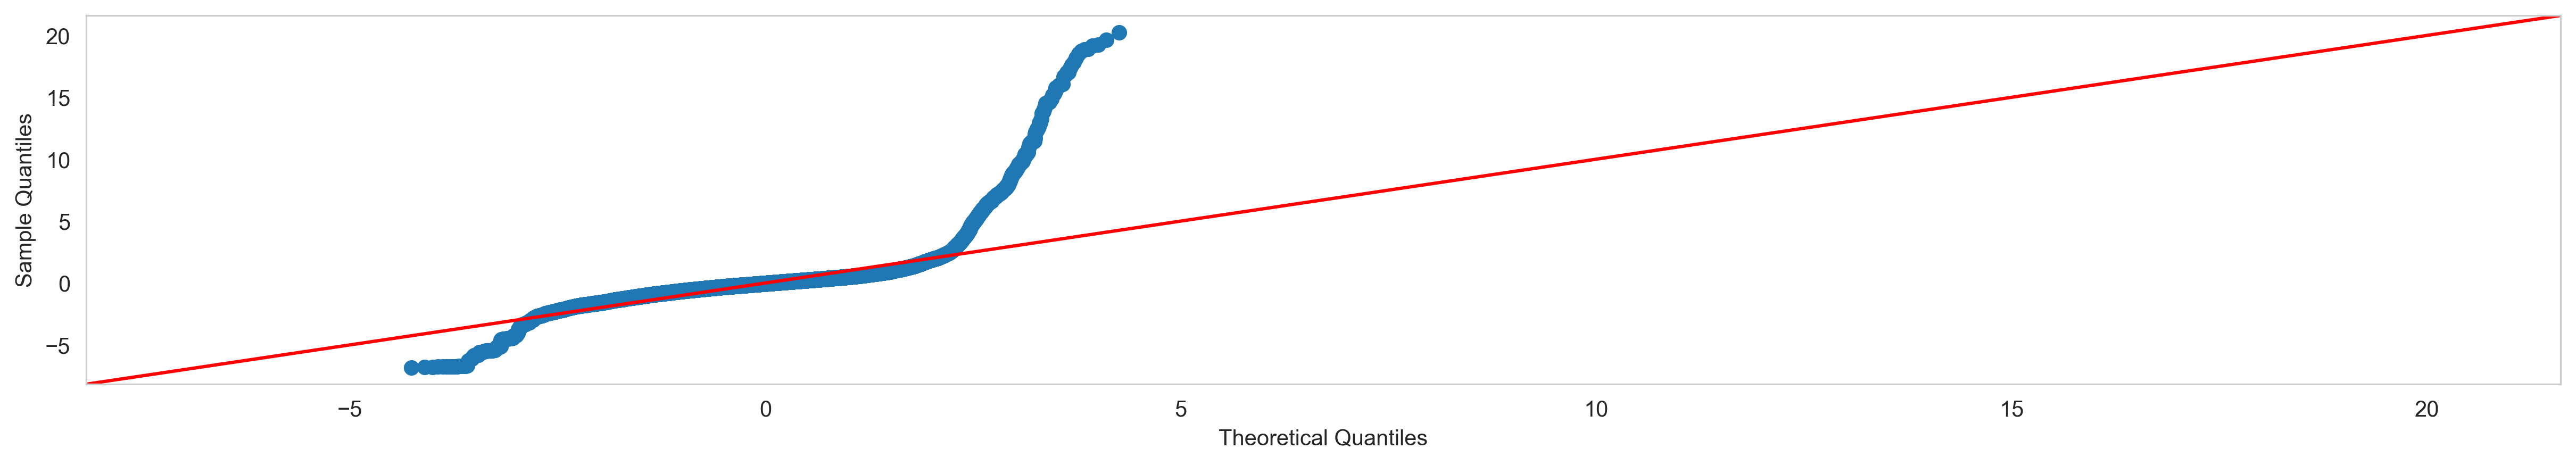

In [37]:
residuals = model_OLS.resid
figure,ax = plt.subplots(figsize=(20,3),dpi=300)
qqplot = sm.qqplot(residuals,line='45',fit=True,ax=ax)
plt.grid(False)

# Check Heteroscedasticity

In [38]:
# from statsmodels.stats.diagnostic import het_white
#
# white_test = het_white(residuals,exog=model_OLS.model.exog)
# labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
# display(dict(zip(labels, white_test)))
# if white_test[1] <= 0.05:
#     print('heteroscedasticity is present in the regression model')
# else:
#     print('heteroscedasticity is not present in the regression model')

In [39]:
#assert model_OLS.df_model == (np.linalg.matrix_rank(model_OLS.model.exog)-1)

# Final Testing metrics

In [40]:
def smape(y_true,y_pred):
    smap = np.zeros(len(y_true))
    num = np.abs(y_true - y_pred)
    dem = ((np.abs(y_true) + np.abs(y_pred)) / 2)
    pos_ind = (y_true!=0)|(y_pred!=0)
    smap[pos_ind] = num[pos_ind] / dem[pos_ind]

    return 100 * np.mean(smap)

# Build Random Forest Model

In [41]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from scipy.stats import randint as sp_randint
#
# model_RF = RandomForestRegressor()
# param_dist = {'n_estimators': sp_randint(50, 500), 'max_depth': [5,10,15,20,25,30,35,40,45,50,None],'min_samples_leaf': sp_randint(1,10)}
#
# random_search = RandomizedSearchCV(model_RF,param_distributions=param_dist,n_iter=10,cv=5, scoring='neg_mean_squared_error')
# random_search.fit(X_train_transformed_final,y_train_norm['microbusiness_density'])
#
# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)

In [42]:
# from sklearn.ensemble import RandomForestRegressor
#
# model_RF = RandomForestRegressor(n_estimators=3000,max_depth=45,random_state=42)
# model_RF.fit(X_train_transformed_final,y_train_norm['microbusiness_density'])
#
# y_pred_RF = model_RF.predict(X_valid_transformed_final)

In [43]:
# print(f'Training score: {model_RF.score(X_train_transformed_final,y_train_norm)}')
# print(f'Testing score: {model_RF.score(X_valid_transformed_final,y_valid_norm)}')

In [44]:
# from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
#
# mae = round(mean_absolute_error(y_valid_norm,y_pred_RF),3)
# print(f'MAE = {mae}')
# print('-'*80)
#
# mse = round(mean_squared_error(y_valid_norm,y_pred_RF),3)
# print(f'MSE = {mse}')
# print('-'*80)
#
# rmse = round(np.sqrt(mean_squared_error(y_valid_norm,y_pred_RF)),3)
# print(f'RMSE = {rmse}')
# print('-'*80)
#
# r2score = round(r2_score(y_valid_norm,y_pred_RF),3)
# print(f'r2_score = {r2score}')
# print('-'*80)

In [45]:
# smape(y_valid_norm['microbusiness_density'],y_pred_RF)

# Stacking Regressor

In [46]:
# from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor,RandomForestRegressor
# from sklearn.ensemble import StackingRegressor
# import xgboost as xgb
#
# GB = GradientBoostingRegressor(n_estimators=150,max_depth=75)
# RF = RandomForestRegressor(n_estimators=150,max_depth=75)
# XGB = xgb.XGBRegressor(n_estimators=150,max_depth=75)
#
# stacking_regressor = StackingRegressor(estimators=[('GB', GB),('RF',RF),('XGB',XGB)])
# stacking_regressor.fit(X_train_transformed_final,y_train_norm['microbusiness_density'])
#
# y_pred_sg = stacking_regressor.predict(X_valid_transformed_final)

In [47]:
# from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
#
# mae = round(mean_absolute_error(y_valid_norm,y_pred_sg),3)
# print(f'MAE = {mae}')
# print('-'*80)
#
# mse = round(mean_squared_error(y_valid_norm,y_pred_sg),3)
# print(f'MSE = {mse}')
# print('-'*80)
#
# rmse = round(np.sqrt(mean_squared_error(y_valid_norm,y_pred_sg)),3)
# print(f'RMSE = {rmse}')
# print('-'*80)
#
# r2score = round(r2_score(y_valid_norm,y_pred_sg),3)
# print(f'r2_score = {r2score}')
# print('-'*80)

In [48]:
# smape(y_valid_norm['microbusiness_density'],y_pred_sg)

# XGB Regressor

In [49]:
# import xgboost as xgb
# from sklearn.metrics import make_scorer
# from sklearn.model_selection import GridSearchCV
#
# # Define the custom SMAPE scoring function
# def smape(y_true, y_pred):
#     return 200*np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
#
# # Create a scorer for SMAPE
# smape_scorer = make_scorer(smape, greater_is_better=False)
#
# param_grid = {
#     'max_depth': [4, 6, 8, 10],
#     'n_estimators': [100, 200, 300],
#     'min_child_weight': [1, 3, 5],
#     'reg_lambda': [0, 0.1, 1]}
#
# regressor = xgb.XGBRegressor()
#
# grid_search = GridSearchCV(regressor,param_grid,cv=5,scoring=smape_scorer)
# grid_search.fit(X_train_transformed_final,y_train_norm['microbusiness_density'])
#
# print(grid_search.best_params_)

In [50]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=750,max_depth=45)
xgb_model.fit(X_train_transformed_final,y_train_norm['microbusiness_density'])

y_pred_xgb = xgb_model.predict(X_valid_transformed_final)

In [51]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

mae = round(mean_absolute_error(y_valid_norm,y_pred_xgb),3)
print(f'MAE = {mae}')
print('-'*80)

mse = round(mean_squared_error(y_valid_norm,y_pred_xgb),3)
print(f'MSE = {mse}')
print('-'*80)

rmse = round(np.sqrt(mean_squared_error(y_valid_norm,y_pred_xgb)),3)
print(f'RMSE = {rmse}')
print('-'*80)

r2score = round(r2_score(y_valid_norm,y_pred_xgb),3)
print(f'r2_score = {r2score}')
print('-'*80)

MAE = 0.069
--------------------------------------------------------------------------------
MSE = 0.168
--------------------------------------------------------------------------------
RMSE = 0.41
--------------------------------------------------------------------------------
r2_score = 0.987
--------------------------------------------------------------------------------


In [52]:
smape(y_valid_norm['microbusiness_density'],y_pred_xgb)

2.113775450946064

# Build a Neural Network

#### Normalize the data

In [53]:
# from sklearn.preprocessing import MinMaxScaler
#
# normalizer = MinMaxScaler()
# X_train_transformed_final_norm = normalizer.fit_transform(X_train_transformed_final)
# X_valid_transformed_final_norm = normalizer.transform(X_valid_transformed_final)
# test_df_transformed_final_norm = normalizer.transform(test_df_transformed_final)

In [54]:
# import tensorflow as tf
#
# tf_model = tf.keras.Sequential()
# tf_model.add(tf.keras.layers.Dense(units=1024,input_shape=[X_train_transformed_final_norm.shape[1]],kernel_regularizer=tf.keras.regularizers.l1_l2(0.1)))
# tf_model.add(tf.keras.layers.Dropout(0.2))
# tf_model.add(tf.keras.layers.Dense(1024,activation='relu'))
# tf_model.add(tf.keras.layers.Dropout(0.2))
# tf_model.add(tf.keras.layers.Dense(1024,activation='relu'))
# tf_model.add(tf.keras.layers.Dropout(0.2))
# tf_model.add(tf.keras.layers.Dense(1024,activation='relu'))
# tf_model.add(tf.keras.layers.Dropout(0.2))
# tf_model.add(tf.keras.layers.Dense(1024,activation='relu'))
# tf_model.add(tf.keras.layers.Dropout(0.2))
#
# tf_model.add(tf.keras.layers.Dense(1))
#
# tf_model.compile(tf.keras.optimizers.Adam(0.00001),loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])
#
# print(f'Input shape: {tf_model.input_shape}')
# tf_model.summary()

In [55]:
# callbacks_list = tf.keras.callbacks.EarlyStopping(monitor="root_mean_squared_error",patience=15)
# history = tf_model.fit(X_train_transformed_final_norm,y_train_norm,epochs=500,callbacks=[callbacks_list],validation_split=0.2)

In [56]:
# tf_model.evaluate(X_train_transformed_final_norm,y_train_norm)

In [57]:
# tf_model.evaluate(X_valid_transformed_final_norm,y_valid_norm)

In [58]:
# tf_pred = tf_model.predict(X_valid_transformed_final_norm)

In [59]:
# from sklearn.metrics import r2_score,mean_absolute_percentage_error
#
# r2 = r2_score(y_valid_norm,tf_pred)
# rmse = round(np.sqrt(mean_squared_error(y_valid_norm,tf_pred)),3)
#
# print(f'R2_score: {r2}')
# print(f'rmse: {rmse}')

In [60]:
# history.history.keys()

In [61]:
# history_dict = history.history
# history_dict.keys() # to get the loss names
# loss_values = history_dict['val_loss']
# acc_values = history_dict['val_root_mean_squared_error']
# epochs = range(1, len(loss_values) + 1)
#
# fig, axes = plt.subplots(2)
# axes[0].set_ylabel("loss", fontsize=14)
# axes[0].plot(loss_values)
# axes[1].set_ylabel("rmse", fontsize=14)
# axes[1].set_xlabel("Iteration", fontsize=14)
# axes[1].plot(acc_values)
# plt.show()

In [62]:
# smape(y_valid_norm['microbusiness_density'],tf_pred.ravel())

# Predict final data

In [63]:
X_final = pd.concat([X_train_transformed_final,X_valid_transformed_final],axis=0)
y_final = pd.concat([y_train_norm,y_valid_norm],axis=0)

X_final

,cfips,county,state,year,month,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,...,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,mean,var,std,cluster
0,-0.617994,-0.929851,-0.807816,-1.702377,0.973531,0.203613,0.075930,0.282094,0.199594,0.146836,...,-0.899301,-0.658491,-0.747771,-0.711748,-0.737749,-1.075755,-0.801962,-0.711721,-0.711748,0.931582
1,-0.286487,0.793192,-0.179936,0.313752,-0.794529,-1.353909,-1.330142,-1.337180,-1.318346,-1.146725,...,-0.074559,-1.329182,-1.239601,-1.140963,-1.139028,-1.125994,-1.204136,-0.952065,-0.952090,0.931582
2,-1.611726,2.085474,2.331584,-1.702377,0.384178,1.627043,1.600976,1.527688,1.523237,1.478442,...,2.915130,2.740971,2.995513,3.241255,3.406833,3.464006,3.221547,3.735016,3.734973,0.227681
3,-1.668473,-0.499091,-1.435696,1.321816,-1.678559,-1.209503,-1.330142,-1.291885,-1.427637,-1.349637,...,-1.208579,-1.167774,-1.073976,-1.057746,-0.996500,-1.125349,-1.095376,-0.891186,-0.891213,0.931582
4,-0.489588,-0.068330,1.075824,-1.702377,1.268208,0.554313,0.313880,0.236799,0.066015,-0.018030,...,-1.002393,-0.321279,-0.258573,-0.145601,-0.232069,-0.298088,-0.252752,-0.315409,-0.315440,0.931582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24414,-0.609944,-0.499091,-0.807816,1.321816,0.089501,-0.487473,-0.443235,-0.510558,-0.431869,-0.499945,...,-0.693115,-0.631374,-0.640620,-0.559077,-0.632254,-0.628246,-0.625105,-0.589162,-0.589191,0.931582
24415,-0.609020,-0.929851,-0.807816,1.321816,-1.383882,-1.405483,-1.308510,-1.212620,-1.269771,-1.070633,...,-0.074559,-1.151092,-1.069518,-1.130446,-0.953523,-1.207148,-1.114969,-0.903305,-0.903331,0.931582
24416,1.095236,-0.929851,-0.179936,-0.694312,0.089501,-1.147615,-1.308510,-1.439092,-1.816230,-1.615958,...,-1.105486,-1.091602,-1.133911,-1.175196,-1.166495,-1.049670,-1.135092,-0.914637,-0.914663,0.931582
24417,0.967225,-0.929851,-0.179936,1.321816,-1.089206,0.028263,0.011034,-0.057614,-0.079707,-0.068758,...,0.440905,-0.595116,-0.570014,-0.552230,-0.577798,-0.592241,-0.583148,-0.560736,-0.560765,0.931582


In [64]:
y_final

,microbusiness_density
0,0.678036
1,1.171362
2,10.699983
3,1.935870
4,3.320883
...,...
24414,1.158895
24415,1.601732
24416,1.583031
24417,2.066626


In [65]:
xgb_model_final = xgb.XGBRegressor(n_estimators=750,max_depth=45)
xgb_model_final.fit(X_final,y_final['microbusiness_density'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=45, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=750, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [66]:
test_df_pred = xgb_model_final.predict(test_df_transformed_final)

In [67]:
submission = pd.DataFrame(test_df['row_id'])
submission['microbusiness_density'] = test_df_pred

submission

,row_id,microbusiness_density
0,1001_2022-11-01,3.441509
1,1001_2022-12-01,3.479812
2,1001_2023-01-01,3.296707
3,1001_2023-02-01,3.333308
4,1001_2023-03-01,3.337531
...,...,...
25075,56045_2023-02-01,1.749980
25076,56045_2023-03-01,1.767572
25077,56045_2023-04-01,1.769193
25078,56045_2023-05-01,1.802063


# Save the submission file

In [68]:
submission.to_csv('submission.csv',index=False)

In [69]:
submission.isna().sum()

row_id                   0
microbusiness_density    0
dtype: int64